<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [ ]:
import pandas as pd
df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5


2. Find out some information about the data...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482742 entries, 0 to 482741
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               479098 non-null  float64
 1   tpep_pickup_datetime   482742 non-null  object 
 2   tpep_dropoff_datetime  482742 non-null  object 
 3   passenger_count        479098 non-null  float64
 4   trip_distance          482742 non-null  float64
 5   RatecodeID             479098 non-null  float64
 6   store_and_fwd_flag     479098 non-null  object 
 7   PULocationID           482742 non-null  int64  
 8   DOLocationID           482742 non-null  int64  
 9   payment_type           479098 non-null  float64
 10  fare_amount            482742 non-null  float64
 11  extra                  482742 non-null  float64
 12  mta_tax                482742 non-null  float64
 13  tip_amount             482742 non-null  float64
 14  tolls_amount           482742 non-nu

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,479098.000000,479098.000000,482742.000000,479098.000000,482742.000000,482742.000000,479098.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000,482742.000000
mean,1.666173,1.550393,2.977807,1.065156,163.502449,161.722570,1.298091,14.358827,1.110255,0.492481,2.245453,0.390203,0.298011,20.414273,2.275034
std,0.471579,1.174092,3.941160,0.903839,66.172609,70.222873,0.487450,573.620806,1.269991,0.071925,2.853395,1.699026,0.033592,573.684344,0.735852
min,1.000000,0.000000,-30.100000,1.000000,1.000000,1.000000,1.000000,-180.000000,-4.500000,-0.500000,-98.760000,-21.230000,-0.300000,-180.300000,-2.500000
25%,1.000000,1.000000,0.960000,1.000000,125.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.300000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.920000,0.000000,0.300000,14.800000,2.500000
75%,2.000000,2.000000,3.020000,1.000000,233.000000,234.000000,2.000000,15.500000,2.500000,0.500000,3.000000,0.000000,0.300000,21.350000,2.500000
max,2.000000,9.000000,93.740000,99.000000,265.000000,265.000000,4.000000,398468.380000,90.060000,0.900000,225.000000,113.880000,0.300000,398471.200000,2.750000


In [ ]:
df.keys()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

3. Show me the relationships in your data... 
- corr
- pariplot
- some other visualization(s) (of your choice)

In [ ]:
# visualize correleation
cor= df.corr()
cor.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10,8))
#sns.histplot(df.total_amount);

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

4. Split your data into training and testing datasets...

In [ ]:
X = df.fare_amount
X = X.loc[X<1000]
y = df.total_amount
y = y.loc[y<1000]

In [ ]:
y_pred_rain=lr.predict(pd.DataFrame(X_train))
y_pred_rain

array([22.54766934, 10.55806218, 44.12896223, ..., 21.94818898,
       65.71025511,  8.16014074])

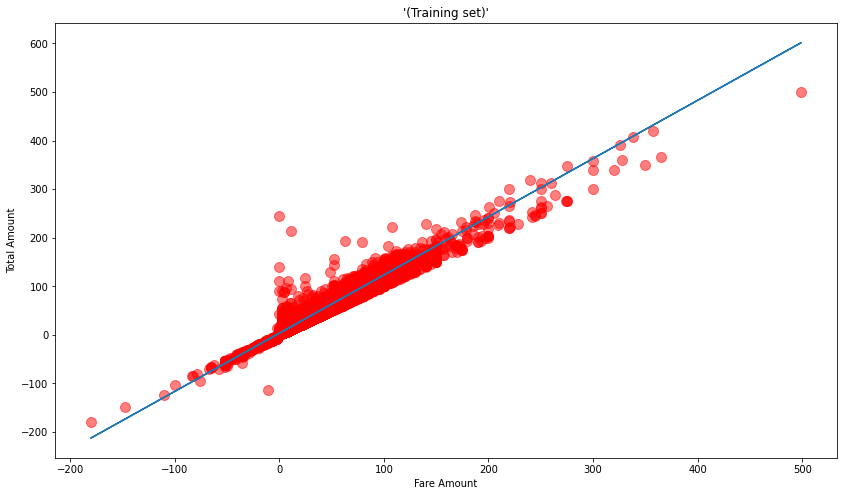

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(x=X_train, y=y_train, color ="red", s=100, alpha=0.5)
plt.plot(X_train,y_pred_rain)
plt.title("'(Training set)'")
plt.xlabel("Fare Amount")
plt.ylabel("Total Amount")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# focus single variable because we're doing simple linear regression


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

5. Import, create, and fit a LinearRegression model with 1 variable

In [ ]:
# import linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
y_pred_rain=lr.predict(pd.DataFrame(X_train))
y_pred_rain

In [ ]:
lr.fit(pd.DataFrame(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Make predictions on your `X_test` values...

In [ ]:
predictions = lr.predict(pd.DataFrame(X_test))

In [ ]:
# what do they look like? (show me some of the predictions)
predictions[-5:]

array([11.05342749, 12.05349046, 18.55389975, 12.55352194, 18.55389975])

In [ ]:
y_test.tail()

51895      9.96
289341    11.80
194677    18.96
373906     9.80
218868    16.80
Name: total_amount, dtype: float64

7. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=predictions)

0.9316024197163262

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=predictions)

2.3113099127342647

In [ ]:
y_test.std()

15.37006181621604

In [ ]:
lr.coef_

array([1.00006297])

In [ ]:
Xtrain = X_train[241370:,]

In [ ]:
X_train

256026    16.5
410149    11.0
117757     4.5
437263    70.0
178293     6.5
          ... 
437782     4.5
95816      8.0
203245     9.5
100879     8.5
351400    14.5
Name: fare_amount, Length: 362056, dtype: float64

In [ ]:
y_train

256026    23.76
410149    18.36
117757     8.30
437263    70.30
178293    11.76
          ...  
437782     8.97
95816     12.30
203245    12.80
100879    14.76
351400    21.96
Name: total_amount, Length: 362056, dtype: float64

In [ ]:
Xtrain

391007    52.0
283264     3.5
472049     4.5
309701    22.0
86116      6.0
          ... 
437782     4.5
95816      8.0
203245     9.5
100879     8.5
351400    14.5
Name: fare_amount, Length: 120686, dtype: float64

In [ ]:
predictions.shape

(120686,)

In [ ]:
y_pred_rain.shape

(362056,)

In [ ]:
X_train.shape

(362056,)

In [ ]:
X_train.max()

398468.38

In [ ]:
y_train.max()

398471.2

In [ ]:
X_train,

(256026    16.5
 410149    11.0
 117757     4.5
 437263    70.0
 178293     6.5
           ... 
 437782     4.5
 95816      8.0
 203245     9.5
 100879     8.5
 351400    14.5
 Name: fare_amount, Length: 362056, dtype: float64,)

In [ ]:
y_pred_rain.shape

(362056,)

In [ ]:
X_train.shape

(362056,)

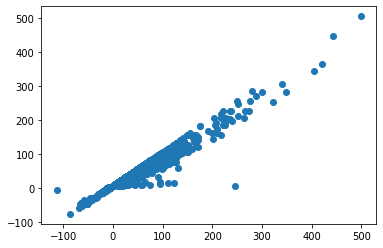

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions);

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X_train.loc[X_train<100000], y=y_train.loc[y_train<100000], color ="red")
plt.plot(X_train.loc[X_train<100000],pd.DataFrame(y_pred_rain).loc[pd.Series(y_pred_rain) <100000])
plt.title("'(Training set)'")
plt.xlabel("")
plt.ylabel("")
plt.show()


ValueError: ignored

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [ ]:
df = df.fillna(lambda x: x.median())

In [ ]:
from sklearn.model_selection import train_test_split


vars = ['trip_distance', 'fare_amount', 'mta_tax', 'tip_amount']  # make sense in my head 

X = df[vars]
y = df.total_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [ ]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482742 entries, 0 to 482741
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               482742 non-null  object 
 1   tpep_pickup_datetime   482742 non-null  object 
 2   tpep_dropoff_datetime  482742 non-null  object 
 3   passenger_count        482742 non-null  object 
 4   trip_distance          482742 non-null  float64
 5   RatecodeID             482742 non-null  object 
 6   store_and_fwd_flag     482742 non-null  object 
 7   PULocationID           482742 non-null  int64  
 8   DOLocationID           482742 non-null  int64  
 9   payment_type           482742 non-null  object 
 10  fare_amount            482742 non-null  float64
 11  extra                  482742 non-null  float64
 12  mta_tax                482742 non-null  float64
 13  tip_amount             482742 non-null  float64
 14  tolls_amount           482742 non-nu

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train

,trip_distance,fare_amount,mta_tax,tip_amount
256026,3.04,16.5,0.5,3.96
410149,1.51,11.0,0.5,3.06
117757,0.75,4.5,0.5,0.00
437263,0.00,70.0,0.0,0.00
178293,0.66,6.5,0.5,1.96
...,...,...,...,...
437782,0.65,4.5,0.5,1.17
95816,1.16,8.0,0.5,0.00
203245,1.40,9.5,0.5,0.00
100879,1.20,8.5,0.5,2.46


In [ ]:
y_train

256026    23.76
410149    18.36
117757     8.30
437263    70.30
178293    11.76
          ...  
437782     8.97
95816     12.30
203245    12.80
100879    14.76
351400    21.96
Name: total_amount, Length: 362056, dtype: float64

In [ ]:
lr.coef_

array([0.20244216, 1.00000311, 2.92590677, 1.13044646])

9. Make predictions on your `X_test` values...

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
predictions[-5:]

array([ 9.96110986, 11.42644162, 19.60824887,  9.659477  , 15.66354449])

In [ ]:
y_test.tail()

51895      9.96
289341    11.80
194677    18.96
373906     9.80
218868    16.80
Name: total_amount, dtype: float64

10. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
r2_score(y_true=y_test, y_pred=predictions)

0.9896667155428314

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.8455614382063614

11. Which model is better? Why?

The second model is better, because we obtained the high rate of R_square and less rate of `
mean_absolute_error
`  with `0.9896667155428314` and `0.8455614382063614` respectively




type your stuff here

12. Perform GridSearchCV with the better data

In [ ]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

In [ ]:
grid.best_score_

0.9913434287673029

14. Score the new model... 
- r2_score
- some other metric of your choice

In [ ]:
lr = LinearRegression(fit_intercept=True,
                      normalize=True)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
r2_score(y_true=y_test, y_pred=predictions)

0.9896667155428314

Did the score change at all? Why?

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.8455614382063614

In [ ]:
0.8455614382063614 - 0.8455614382063614

0.0

Our model did not infact because we got the same result

**Group members:**\
Farah Sidina\
Sarah Alhugail\
Eatidal Almutairi\
Bedoor Alharbi